In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
from pprint import pprint
sb.set()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Table2.1')
d2 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.6')
d3 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.7')

In [4]:
print(d1.shape)
data=d1.rename(columns={'Country name':'Country', 
                      'Life Ladder':'Happiness',
                      'Log GDP per capita':'LogGDP',
                      'Healthy life expectancy at birth':'Life_expectancy',
                      'Freedom to make life choices': 'Freedom',
                      'Positive affect':'Pos_affect',
                      'Negative affect':'Neg_affect',
                      'GINI index (World Bank estimate)':'GINI',
                      'GINI index (World Bank estimate), average 2000-16':'GINI_average',
                      'gini of household income reported in Gallup, by wp5-year':'GINI_householdincome',
                       })
data = data.iloc[:,0:20]
data = data.drop(['GINI','GINI_average', 'Most people can be trusted, Gallup'], axis=1)
data.head()

(1704, 26)


,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.344540


In [5]:
for i in range(5, 19):
    new = str(i)
    if i<10:
        new = str(0) + str(i)
    dfname = 'WHR' + new
    print(dfname + " = data.loc[(data['Year'] == " + str(i+2000) + ')].reset_index(drop=True)')

WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)


In [6]:
WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)

In [7]:
print(WHR09.shape)

(114, 17)


In [8]:
WHR09.head()

,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
1,Albania,2009,5.485470,9.161638,0.833047,66.199997,0.525223,-0.160855,0.863665,0.640024,0.279257,NaN,0.048114,-0.264635,1.919640,0.349950,0.617361
2,Argentina,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.368422
3,Armenia,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.427577
4,Azerbaijan,2009,4.573725,9.641726,0.735970,63.020000,0.498138,-0.106351,0.753850,0.543640,0.233942,0.774252,-0.767848,-0.758656,1.893334,0.413959,0.331236


## GINI_householdincome only available starting from WHR09

In [9]:
Country_id = {}

data['Country'] = data['Country'].astype('category')
countryno = 0
for i in range(1703):
    if (data['Country'][i] != data['Country'][i+1]):
#         print(str(countryno) + '\t' + data['Country'][i] + '\t')
        Country_id[countryno] = data['Country'][i]
        countryno+=1

In [10]:
data.columns

Index(['Country', 'Year', 'Happiness', 'LogGDP', 'Social support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
       'Pos_affect', 'Neg_affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI_householdincome'],
      dtype='object')

Intercept of Regression 	: b =  [4.47146353]
Coefficients of Regression 	: a =  [[ 9.23927720e-02  2.82293165e-01 -8.92108347e-04  1.69288167e-01
   3.57690564e-01 -9.73281869e-01  7.69264708e-01  5.46261625e-01
  -3.53024570e-01 -6.03456590e-03  1.06349397e-01  1.82652393e+00
  -9.24282628e+00 -9.00365974e-02]]

                                           Predictors  Coefficients
0                                              LogGDP      0.092393
1                                      Social support      0.282293
2                                     Life_expectancy     -0.000892
3                                             Freedom      0.169288
4                                          Generosity      0.357691
5                           Perceptions of corruption     -0.973282
6                                          Pos_affect      0.769265
7                                          Neg_affect      0.546262
8                   Confidence in national government     -0.353025
9    

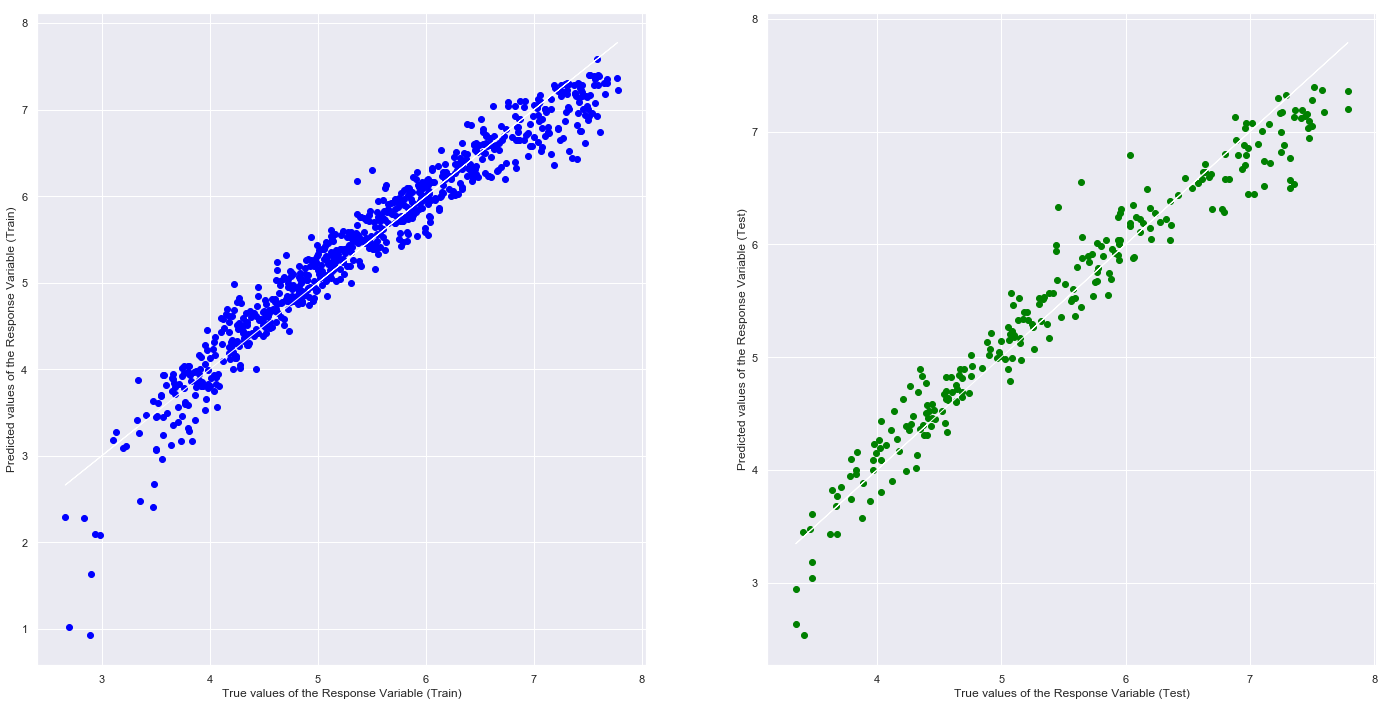

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9399560165603177
Mean Squared Error (MSE) 	: 0.08020162004607789

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9478988876142523
Mean Squared Error (MSE) 	: 0.0712482871191073



In [11]:
data = data.dropna()
# Extract Response and Predictors
y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[['LogGDP', 'Social support',
                       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
                       'Pos_affect', 'Neg_affect', 'Confidence in national government',
                       'Democratic Quality', 'Delivery Quality',
                       'Standard deviation of ladder by country-year',
                       'Standard deviation/Mean of ladder by country-year',
                       'GINI_householdincome']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [-2.66753349]
Coefficients of Regression 	: a =  [[0.26703298 2.89783564 0.052428  ]]

        Predictors  Coefficients
0           LogGDP      0.267033
1   Social support      2.897836
2  Life_expectancy      0.052428



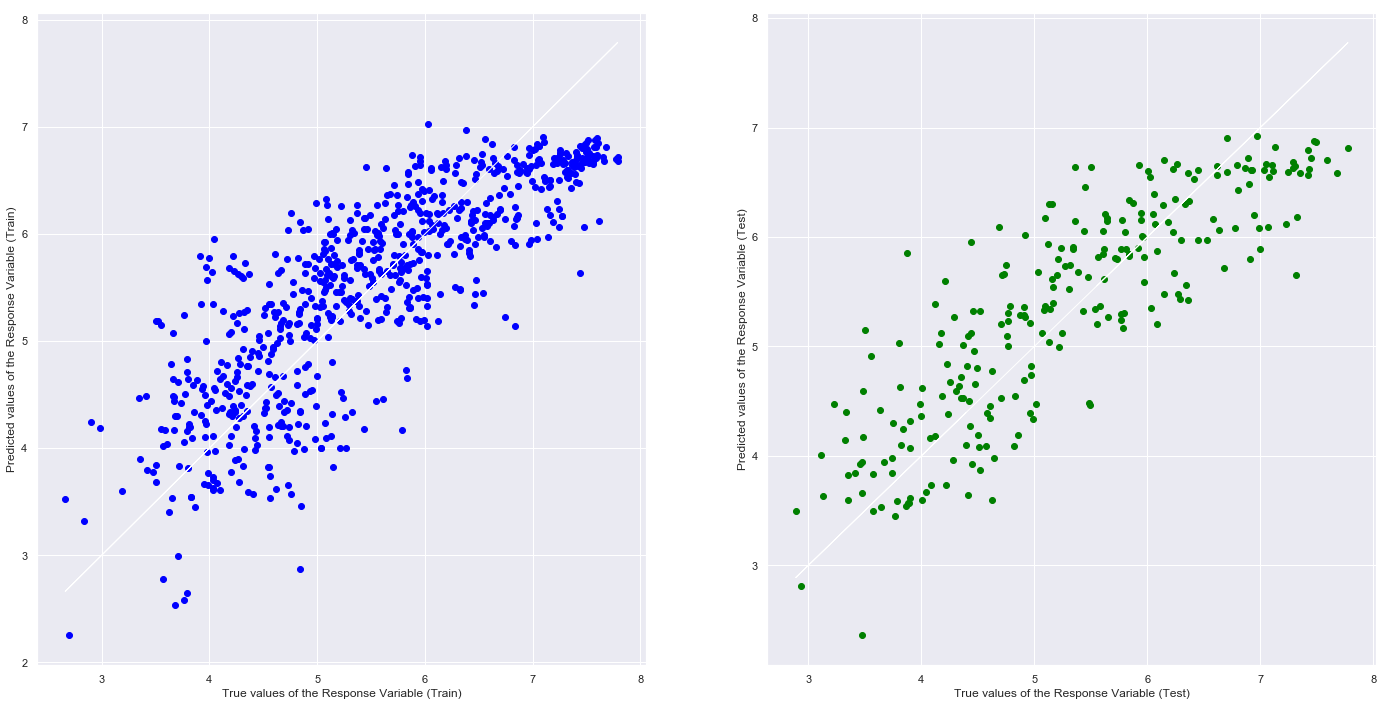

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.67765900772078
Mean Squared Error (MSE) 	: 0.4246366786641438

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7215294204943234
Mean Squared Error (MSE) 	: 0.38446128321746126



In [12]:
# Extract Response and Predictors
predictors = ['LogGDP', 'Social support', 'Life_expectancy']

y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [13]:
Stocks = pd.read_csv('Data\Stocks\S&P 500 (^GSPC)_2005to2018_daily.csv')

In [14]:
Stocks["Average"] = (Stocks["High"] + Stocks["Low"])/2
Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,1187.450012


In [15]:
for i in range(2005, 2019):
    print('Stocks' + str(i) + " = Stocks.loc[(Stocks['Date'].str.contains('" + str(i) + "'))]\nStocks"
          + str(i) + "['Log10_volume'] = np.log10(Stocks" + str(i) + "['Volume'])\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)\ntemp = Stocks"
          + str(i) + "['Log10_volume'].sum()\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])\nStocks"
          + str(i) + ' = Stocks' + str(i) + ".append([0]).rename(index={'mean':'" + str(i) +"'})\nStocks"
          + str(i) + "['Log10_volume'] = temp\nStocks"
          + str(i) + ' = Stocks' + str(i) + '.drop(0, axis=1).drop(0, axis=0)\nStocks'
          + str(i) + "\n")

Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, ax

In [16]:
Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, axis=0)
Stocks2006

Stocks2007 = Stocks.loc[(Stocks['Date'].str.contains('2007'))]
Stocks2007['Log10_volume'] = np.log10(Stocks2007['Volume'])
Stocks2007 = Stocks2007.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2007['Log10_volume'].sum()
Stocks2007 = Stocks2007.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2007 = Stocks2007.append([0]).rename(index={'mean':'2007'})
Stocks2007['Log10_volume'] = temp
Stocks2007 = Stocks2007.drop(0, axis=1).drop(0, axis=0)
Stocks2007

Stocks2008 = Stocks.loc[(Stocks['Date'].str.contains('2008'))]
Stocks2008['Log10_volume'] = np.log10(Stocks2008['Volume'])
Stocks2008 = Stocks2008.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2008['Log10_volume'].sum()
Stocks2008 = Stocks2008.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2008 = Stocks2008.append([0]).rename(index={'mean':'2008'})
Stocks2008['Log10_volume'] = temp
Stocks2008 = Stocks2008.drop(0, axis=1).drop(0, axis=0)
Stocks2008

Stocks2009 = Stocks.loc[(Stocks['Date'].str.contains('2009'))]
Stocks2009['Log10_volume'] = np.log10(Stocks2009['Volume'])
Stocks2009 = Stocks2009.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2009['Log10_volume'].sum()
Stocks2009 = Stocks2009.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2009 = Stocks2009.append([0]).rename(index={'mean':'2009'})
Stocks2009['Log10_volume'] = temp
Stocks2009 = Stocks2009.drop(0, axis=1).drop(0, axis=0)
Stocks2009

Stocks2010 = Stocks.loc[(Stocks['Date'].str.contains('2010'))]
Stocks2010['Log10_volume'] = np.log10(Stocks2010['Volume'])
Stocks2010 = Stocks2010.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2010['Log10_volume'].sum()
Stocks2010 = Stocks2010.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2010 = Stocks2010.append([0]).rename(index={'mean':'2010'})
Stocks2010['Log10_volume'] = temp
Stocks2010 = Stocks2010.drop(0, axis=1).drop(0, axis=0)
Stocks2010

Stocks2011 = Stocks.loc[(Stocks['Date'].str.contains('2011'))]
Stocks2011['Log10_volume'] = np.log10(Stocks2011['Volume'])
Stocks2011 = Stocks2011.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2011['Log10_volume'].sum()
Stocks2011 = Stocks2011.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2011 = Stocks2011.append([0]).rename(index={'mean':'2011'})
Stocks2011['Log10_volume'] = temp
Stocks2011 = Stocks2011.drop(0, axis=1).drop(0, axis=0)
Stocks2011

Stocks2012 = Stocks.loc[(Stocks['Date'].str.contains('2012'))]
Stocks2012['Log10_volume'] = np.log10(Stocks2012['Volume'])
Stocks2012 = Stocks2012.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2012['Log10_volume'].sum()
Stocks2012 = Stocks2012.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2012 = Stocks2012.append([0]).rename(index={'mean':'2012'})
Stocks2012['Log10_volume'] = temp
Stocks2012 = Stocks2012.drop(0, axis=1).drop(0, axis=0)
Stocks2012

Stocks2013 = Stocks.loc[(Stocks['Date'].str.contains('2013'))]
Stocks2013['Log10_volume'] = np.log10(Stocks2013['Volume'])
Stocks2013 = Stocks2013.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2013['Log10_volume'].sum()
Stocks2013 = Stocks2013.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2013 = Stocks2013.append([0]).rename(index={'mean':'2013'})
Stocks2013['Log10_volume'] = temp
Stocks2013 = Stocks2013.drop(0, axis=1).drop(0, axis=0)
Stocks2013

Stocks2014 = Stocks.loc[(Stocks['Date'].str.contains('2014'))]
Stocks2014['Log10_volume'] = np.log10(Stocks2014['Volume'])
Stocks2014 = Stocks2014.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2014['Log10_volume'].sum()
Stocks2014 = Stocks2014.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2014 = Stocks2014.append([0]).rename(index={'mean':'2014'})
Stocks2014['Log10_volume'] = temp
Stocks2014 = Stocks2014.drop(0, axis=1).drop(0, axis=0)
Stocks2014

Stocks2015 = Stocks.loc[(Stocks['Date'].str.contains('2015'))]
Stocks2015['Log10_volume'] = np.log10(Stocks2015['Volume'])
Stocks2015 = Stocks2015.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2015['Log10_volume'].sum()
Stocks2015 = Stocks2015.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2015 = Stocks2015.append([0]).rename(index={'mean':'2015'})
Stocks2015['Log10_volume'] = temp
Stocks2015 = Stocks2015.drop(0, axis=1).drop(0, axis=0)
Stocks2015

Stocks2016 = Stocks.loc[(Stocks['Date'].str.contains('2016'))]
Stocks2016['Log10_volume'] = np.log10(Stocks2016['Volume'])
Stocks2016 = Stocks2016.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2016['Log10_volume'].sum()
Stocks2016 = Stocks2016.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2016 = Stocks2016.append([0]).rename(index={'mean':'2016'})
Stocks2016['Log10_volume'] = temp
Stocks2016 = Stocks2016.drop(0, axis=1).drop(0, axis=0)
Stocks2016

Stocks2017 = Stocks.loc[(Stocks['Date'].str.contains('2017'))]
Stocks2017['Log10_volume'] = np.log10(Stocks2017['Volume'])
Stocks2017 = Stocks2017.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2017['Log10_volume'].sum()
Stocks2017 = Stocks2017.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2017 = Stocks2017.append([0]).rename(index={'mean':'2017'})
Stocks2017['Log10_volume'] = temp
Stocks2017 = Stocks2017.drop(0, axis=1).drop(0, axis=0)
Stocks2017

Stocks2018 = Stocks.loc[(Stocks['Date'].str.contains('2018'))]
Stocks2018['Log10_volume'] = np.log10(Stocks2018['Volume'])
Stocks2018 = Stocks2018.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2018['Log10_volume'].sum()
Stocks2018 = Stocks2018.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2018 = Stocks2018.append([0]).rename(index={'mean':'2018'})
Stocks2018['Log10_volume'] = temp
Stocks2018 = Stocks2018.drop(0, axis=1).drop(0, axis=0)
Stocks2018;

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [17]:
for i in range(2006, 2019):
    print("Stocks" + str(i) + ",")

Stocks2006,
Stocks2007,
Stocks2008,
Stocks2009,
Stocks2010,
Stocks2011,
Stocks2012,
Stocks2013,
Stocks2014,
Stocks2015,
Stocks2016,
Stocks2017,
Stocks2018,


In [18]:
stock_aggregate = Stocks2005.append([Stocks2006,
                                    Stocks2007,
                                    Stocks2008,
                                    Stocks2009,
                                    Stocks2010,
                                    Stocks2011,
                                    Stocks2012,
                                    Stocks2013,
                                    Stocks2014,
                                    Stocks2015,
                                    Stocks2016,
                                    Stocks2017,
                                    Stocks2018,])
stock_aggregate

,Average,Close,High,Log10_volume,Low,Open
2005,1207.289366,1207.229443,1212.572896,2337.654564,1202.005837,1207.087063
2006,1310.053308,1310.461236,1315.611637,2352.813144,1304.494979,1309.762590
2007,1476.593744,1477.184342,1485.241034,2384.140989,1467.946455,1476.958364
2008,1220.340279,1220.042056,1235.699725,2450.126057,1204.980832,1222.026956
2009,947.316607,948.046388,956.346349,2452.652220,938.286864,947.022063
2010,1138.927181,1139.965512,1146.573372,2430.873599,1131.280990,1139.369761
2011,1267.200099,1267.638809,1277.223450,2419.027587,1257.176747,1267.618211
2012,1378.557202,1379.354160,1385.845401,2388.513785,1371.269002,1378.680638
2013,1642.677934,1643.798968,1649.615712,2399.137974,1635.740156,1642.298649
2014,1930.564290,1931.376110,1938.835599,2398.547225,1922.292981,1930.754485


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

Using TensorFlow backend.


In [20]:
df = Stocks['Average'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(3523, 1)


array([[1214.48999  ],
       [1209.0599975],
       [1195.6149905],
       [1188.2249755],
       [1187.4500125]])

In [21]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(2818, 1)
(755, 1)


In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.36755833],
       [0.36380358],
       [0.35450657],
       [0.34939649],
       [0.34886062]])

In [23]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.95889131],
       [0.94742995],
       [0.92036526],
       [0.91975329],
       [0.90753131]])

In [24]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# dataset_train[50-50:50, 0]
# dataset_train[50, 0]

0.3604049502850012

In [25]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]
x_train.shape
# y_train[:1]

(2768, 50)

In [26]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]
x_test.shape

(705, 50)

In [27]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(2768, 50, 1)

In [28]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [57]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 96)                74112     
__________

In [58]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [31]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [32]:
model = load_model('stock_prediction.h5')

(705, 1)

 (705, 1)


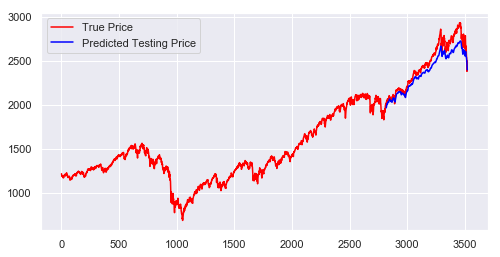

In [33]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)
print("\n", predictions.shape)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

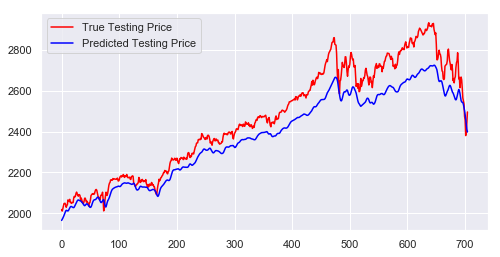

In [34]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

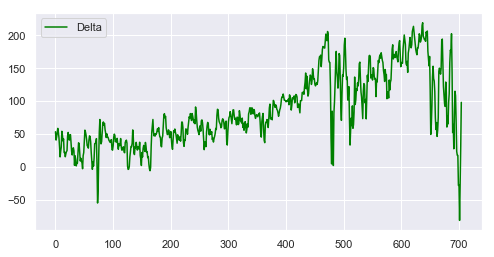

In [35]:
delta = y_test_scaled - predictions

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(delta, color='green', label='Delta')
plt.legend()

In [36]:
# metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
model_metric = ['MSE', 'MAE', 'MAPE', 'CP']

score = model.evaluate(x_test, y_test, verbose=1)
for i in range(len(model_metric)):
    if i==0:
        print()
    print(model_metric[i] + ":\t", score[i])

705/705 [==============================] - 2s 2ms/step

MSE:	 0.004979114525072963
MAE:	 0.004979114525072963
MAPE:	 0.060026601781236366
CP:	 4.584847840518816


# Predicting Stock['Open'] with happiness too

In [37]:
US = data.loc[(data['Country'].str.contains('United States'))].reset_index(drop=True)
US

,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,United States,2009,7.158032,10.790511,0.911794,68.540001,0.830684,0.192269,0.665394,0.843484,0.261661,0.503047,0.772818,1.450143,2.021277,0.282379,0.705702
1,United States,2010,7.163616,10.807183,0.926159,68.699997,0.828044,0.235522,0.689583,0.860642,0.231053,0.418276,0.786005,1.478330,2.182074,0.304605,0.739406
2,United States,2011,7.115139,10.815644,0.921705,68.680000,0.863202,0.152239,0.696926,0.836360,0.273379,0.382532,0.859107,1.462401,1.945976,0.273498,0.612990
3,United States,2012,7.026227,10.830132,0.903192,68.660004,0.822662,0.206243,0.710034,0.833771,0.259644,0.348856,0.897015,1.467070,2.163160,0.307869,0.629069
4,United States,2013,7.249285,10.839653,0.925397,68.639999,0.792256,0.265563,0.746894,0.813678,0.260328,0.288648,0.873046,1.415544,1.938088,0.267349,0.678262
5,United States,2014,7.151114,10.857497,0.902097,68.620003,0.866077,0.212869,0.702267,0.834294,0.281265,0.348671,0.826821,1.433888,2.070654,0.289557,0.753396
6,United States,2015,6.863947,10.878154,0.903571,68.599998,0.848753,0.210956,0.697543,0.813908,0.274688,0.346936,0.893903,1.428245,1.953670,0.284628,0.649792
7,United States,2016,6.803600,10.885554,0.896751,68.500000,0.757893,0.135592,0.738920,0.805674,0.264204,0.297206,0.755765,1.491426,1.972203,0.289876,0.693315
8,United States,2017,6.991759,10.900906,0.921003,68.400002,0.868497,0.188833,0.681191,0.826555,0.268269,0.386535,0.677056,1.552135,1.880688,0.268986,0.610804


In [38]:
# US = US[['Year', 'Happiness', 'Pos_affect', 'Neg_affect']]
US = US[['Year', 'Happiness']]
US

,Year,Happiness
0,2009,7.158032
1,2010,7.163616
2,2011,7.115139
3,2012,7.026227
4,2013,7.249285
5,2014,7.151114
6,2015,6.863947
7,2016,6.803600
8,2017,6.991759


In [39]:
Stocks = Stocks.drop("Adj Close", axis=1)
Stocks.head()

,Date,Open,High,Low,Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1569100000,1187.450012


In [40]:
df_happy = Stocks[['Average','Volume']].values
df_happy = df_happy.reshape(-1, 2)
print(df.shape)
df_happy[:5]


(3523, 1)


array([[1.21448999e+03, 7.86900000e+08],
       [1.20906000e+03, 1.51080000e+09],
       [1.19561499e+03, 1.72100000e+09],
       [1.18822498e+03, 1.73890000e+09],
       [1.18745001e+03, 1.56910000e+09]])

In [41]:
lookback = 50
dataset_train_h = np.array(df_happy[:int(df_happy.shape[0]*0.8)])
dataset_test_h = np.array(df_happy[int(df_happy.shape[0]*0.8)-lookback:])
print(dataset_train_h.shape)
print(dataset_test_h.shape)

(2818, 2)
(755, 2)


In [42]:
# scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
# average_h = scaler1.fit_transform(dataset_train_h[:,0].reshape(int(dataset_train_h.shape[0]),1))
dataset_train_h = scaler2.fit_transform(dataset_train_h)
dataset_train_h[:5] 
# average_h[:5]

array([[0.36755833, 0.00577377],
       [0.36380358, 0.07323071],
       [0.35450657, 0.09281829],
       [0.34939649, 0.09448631],
       [0.34886062, 0.07866342]])

In [43]:
dataset_test_h = scaler2.transform(dataset_test_h) 
dataset_test_h[:5]

array([[0.95889131, 0.15305616],
       [0.94742995, 0.17988425],
       [0.92036526, 0.33359829],
       [0.91975329, 0.27784917],
       [0.90753131, 0.33655972]])

In [44]:
def create_dataset_2features(df):
    lookback = 50
    x = []
    y = []
    for i in range(lookback, df.shape[0]):
        x.append(df[i-lookback:i, :])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [45]:
x_train_h, y_train_h = create_dataset_2features(dataset_train_h)
x_train_h[:1] 

array([[[0.36755833, 0.00577377],
        [0.36380358, 0.07323071],
        [0.35450657, 0.09281829],
        [0.34939649, 0.09448631],
        [0.34886062, 0.07866342],
        [0.3486739 , 0.07016491],
        [0.35047871, 0.07132973],
        [0.3474016 , 0.07118063],
        [0.34493992, 0.07801112],
        [0.34492261, 0.07318412],
        [0.3446287 , 0.05688598],
        [0.34926857, 0.08124466],
        [0.35075874, 0.07210317],
        [0.34303487, 0.09011591],
        [0.33930772, 0.08559642],
        [0.33568094, 0.07172111],
        [0.33612003, 0.08251198],
        [0.33830511, 0.08488821],
        [0.33943915, 0.08159876],
        [0.33743729, 0.085438  ],
        [0.34143751, 0.08897905],
        [0.34762976, 0.0891822 ],
        [0.35206565, 0.07797758],
        [0.35021936, 0.07729919],
        [0.35516695, 0.08603066],
        [0.35872119, 0.0579921 ],
        [0.3593608 , 0.06441257],
        [0.35593795, 0.07325308],
        [0.35418159, 0.07144807],
        [0.358

In [46]:
x_test_h, y_test_h = create_dataset_2features(dataset_test_h)
x_test_h[:1] 

array([[[0.95889131, 0.15305616],
        [0.94742995, 0.17988425],
        [0.92036526, 0.33359829],
        [0.91975329, 0.27784917],
        [0.90753131, 0.33655972],
        [0.8845014 , 0.40551043],
        [0.86884277, 0.36715064],
        [0.85428358, 0.3617785 ],
        [0.86292021, 0.38786763],
        [0.85428012, 0.40648328],
        [0.84621051, 0.4208413 ],
        [0.8327646 , 0.44202701],
        [0.82983614, 0.39169662],
        [0.80301699, 0.53033046],
        [0.82042851, 0.4057173 ],
        [0.83682361, 0.38921882],
        [0.83544064, 0.34259069],
        [0.83657122, 0.33854271],
        [0.83801294, 0.37545346],
        [0.83349065, 0.36976636],
        [0.85341577, 0.44473964],
        [0.86491515, 0.33524301],
        [0.85283148, 0.34835048],
        [0.83820312, 0.41448978],
        [0.85121339, 0.41638796],
        [0.83664036, 0.39184478],
        [0.80759457, 0.45768216],
        [0.80810626, 0.41544679],
        [0.81803942, 0.3490941 ],
        [0.792

In [47]:
# Reshape features for LSTM Layer
x_train_h = np.reshape(x_train_h, (x_train_h.shape[0], x_train_h.shape[1], 2))
x_test_h = np.reshape(x_test_h, (x_test_h.shape[0], x_test_h.shape[1], 2)) 
print(x_train_h.shape)

(2768, 50, 2)


In [48]:
model_happy = Sequential()
model_happy.add(LSTM(units=96, return_sequences=True, input_shape=(x_train_h.shape[1], 2)))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96, return_sequences=True))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96, return_sequences=True))
model_happy.add(Dropout(0.2))
model_happy.add(LSTM(units=96))
model_happy.add(Dropout(0.2))
model_happy.add(Dense(units=1))

In [49]:
model_happy.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 96)            38016     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 96)                74112     
__________

In [50]:
model_happy.compile(loss='mean_squared_error', 
                    optimizer='adam',
                    metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [51]:
if(not os.path.exists('stock_prediction_happy.h5')):
    model_happy.fit(x_train_h, y_train_h, epochs=50, batch_size=32)
    model_happy.save('stock_prediction_happy.h5')

In [52]:
model_happy = load_model('stock_prediction_happy.h5')

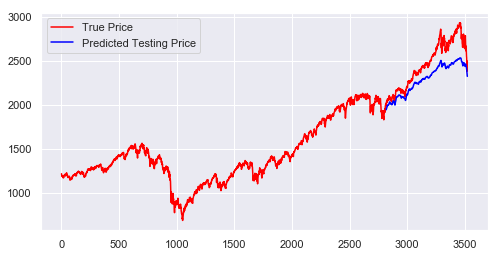

In [53]:
df2 = Stocks['Average'].values

predictions_happy = model_happy.predict(x_test_h)
predictions_happy = scaler.inverse_transform(predictions_happy)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df2, color='red',  label="True Price")
ax.plot(range(len(y_train_h)+50,len(y_train_h)+50+len(predictions_happy)),predictions_happy, color='blue', label='Predicted Testing Price')

plt.legend()

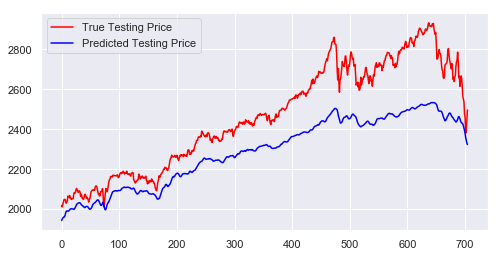

In [54]:
y_test_scaled_happy = scaler.inverse_transform(y_test_h.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled_happy, color='red', label='True Testing Price')
plt.plot(predictions_happy, color='blue', label='Predicted Testing Price')
plt.legend()

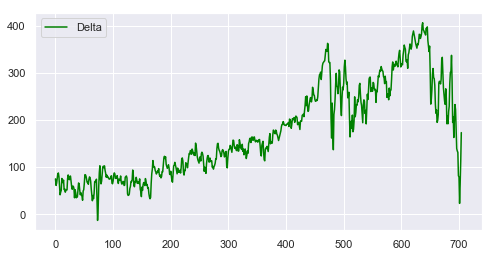

In [55]:
delta_happy = y_test_scaled_happy - predictions_happy

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(delta_happy, color='green', label='Delta')
plt.legend()

In [56]:
# metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
model_metric = ['MSE', 'MAE', 'MAPE', 'CP']

score_happy = model_happy.evaluate(x_test_h, y_test_h, verbose=1)
for i in range(len(model_metric)):
    if i==0:
        print()
    print(model_metric[i] + ":\t", score_happy[i])

705/705 [==============================] - 2s 3ms/step

MSE:	 0.018924628387053385
MAE:	 0.018924628387053385
MAPE:	 0.11986193251102528
CP:	 9.165824915838579
